In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [135]:
df1=pd.read_csv('train.csv')

In [136]:
df1.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [137]:
df2=pd.read_csv('test.csv')

In [138]:
df2.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17346 entries, 0 to 6938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17346 non-null  int64  
 1   allelectrons_Total     17346 non-null  float64
 2   density_Total          17346 non-null  float64
 3   allelectrons_Average   17346 non-null  float64
 4   val_e_Average          17346 non-null  float64
 5   atomicweight_Average   17346 non-null  float64
 6   ionenergy_Average      17346 non-null  float64
 7   el_neg_chi_Average     17346 non-null  float64
 8   R_vdw_element_Average  17346 non-null  float64
 9   R_cov_element_Average  17346 non-null  float64
 10  zaratio_Average        17346 non-null  float64
 11  density_Average        17346 non-null  float64
 12  Hardness               17346 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.9 MB


In [140]:
df=pd.concat([df1,df2])

In [141]:
df.head(80)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000,4.800,20.612526,11.088100,2.766000,1.732000,0.86000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000,4.800,20.298893,12.040830,2.755000,1.631000,0.91000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600,5.600,33.739258,12.086300,2.828000,1.788000,0.86400,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000,4.800,20.213349,10.948500,2.648000,1.626000,0.93600,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600,4.800,24.988133,11.824480,2.766000,1.682000,0.89600,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,36.0,3.550000,18.000,4.000,36.068500,8.236600,1.790000,2.055000,1.39000,0.499000,1.42396,4.0
76,76,80.0,7.734660,10.000,4.000,20.255278,11.026725,2.790000,1.672500,0.85250,0.495275,1.02525,7.5
77,77,582.0,73.790135,10.875,4.625,22.206043,10.851106,2.670313,1.788125,0.94625,0.475903,0.42774,3.8
78,78,96.0,15.550000,48.000,2.000,116.325500,10.398750,2.240000,2.015000,1.18000,0.448895,7.66000,3.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17346 entries, 0 to 6938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17346 non-null  int64  
 1   allelectrons_Total     17346 non-null  float64
 2   density_Total          17346 non-null  float64
 3   allelectrons_Average   17346 non-null  float64
 4   val_e_Average          17346 non-null  float64
 5   atomicweight_Average   17346 non-null  float64
 6   ionenergy_Average      17346 non-null  float64
 7   el_neg_chi_Average     17346 non-null  float64
 8   R_vdw_element_Average  17346 non-null  float64
 9   R_cov_element_Average  17346 non-null  float64
 10  zaratio_Average        17346 non-null  float64
 11  density_Average        17346 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.9 MB


In [143]:
df['Hardness'].value_counts()

6.00     2063
5.50     1463
2.50     1089
3.80      712
5.80      403
6.50      397
2.00      388
2.80      387
5.00      375
4.00      370
3.00      310
2.30      292
6.30      266
3.50      261
6.80      240
1.50      174
1.80      158
3.30      144
5.30      135
4.30      130
4.80      105
7.50       98
4.50       97
7.00       96
7.80       64
9.00       33
10.00      30
9.50       25
1.30       18
8.50       15
8.00       12
5.75       10
6.20       10
7.30       10
8.10        7
2.90        5
1.00        2
2.20        1
5.40        1
6.70        1
2.60        1
3.60        1
8.30        1
4.10        1
3.20        1
4.70        1
6.40        1
9.80        1
2.10        1
6.64        1
Name: Hardness, dtype: int64

In [150]:
missing_values = [np.nan, None, "", "NA", "NaN"] 
missing_count = y.isin(missing_values).sum()
print("Eksik değer sayısı:", missing_count)
#data da eksik değerler bazen 'nan','na','""' olarak geçer,burad da böyleydi, bu kodla bulabildik.

Eksik değer sayısı: 6939


In [145]:
df.isnull().sum()

id                          0
allelectrons_Total          0
density_Total               0
allelectrons_Average        0
val_e_Average               0
atomicweight_Average        0
ionenergy_Average           0
el_neg_chi_Average          0
R_vdw_element_Average       0
R_cov_element_Average       0
zaratio_Average             0
density_Average             0
Hardness                 6939
dtype: int64

<AxesSubplot: >

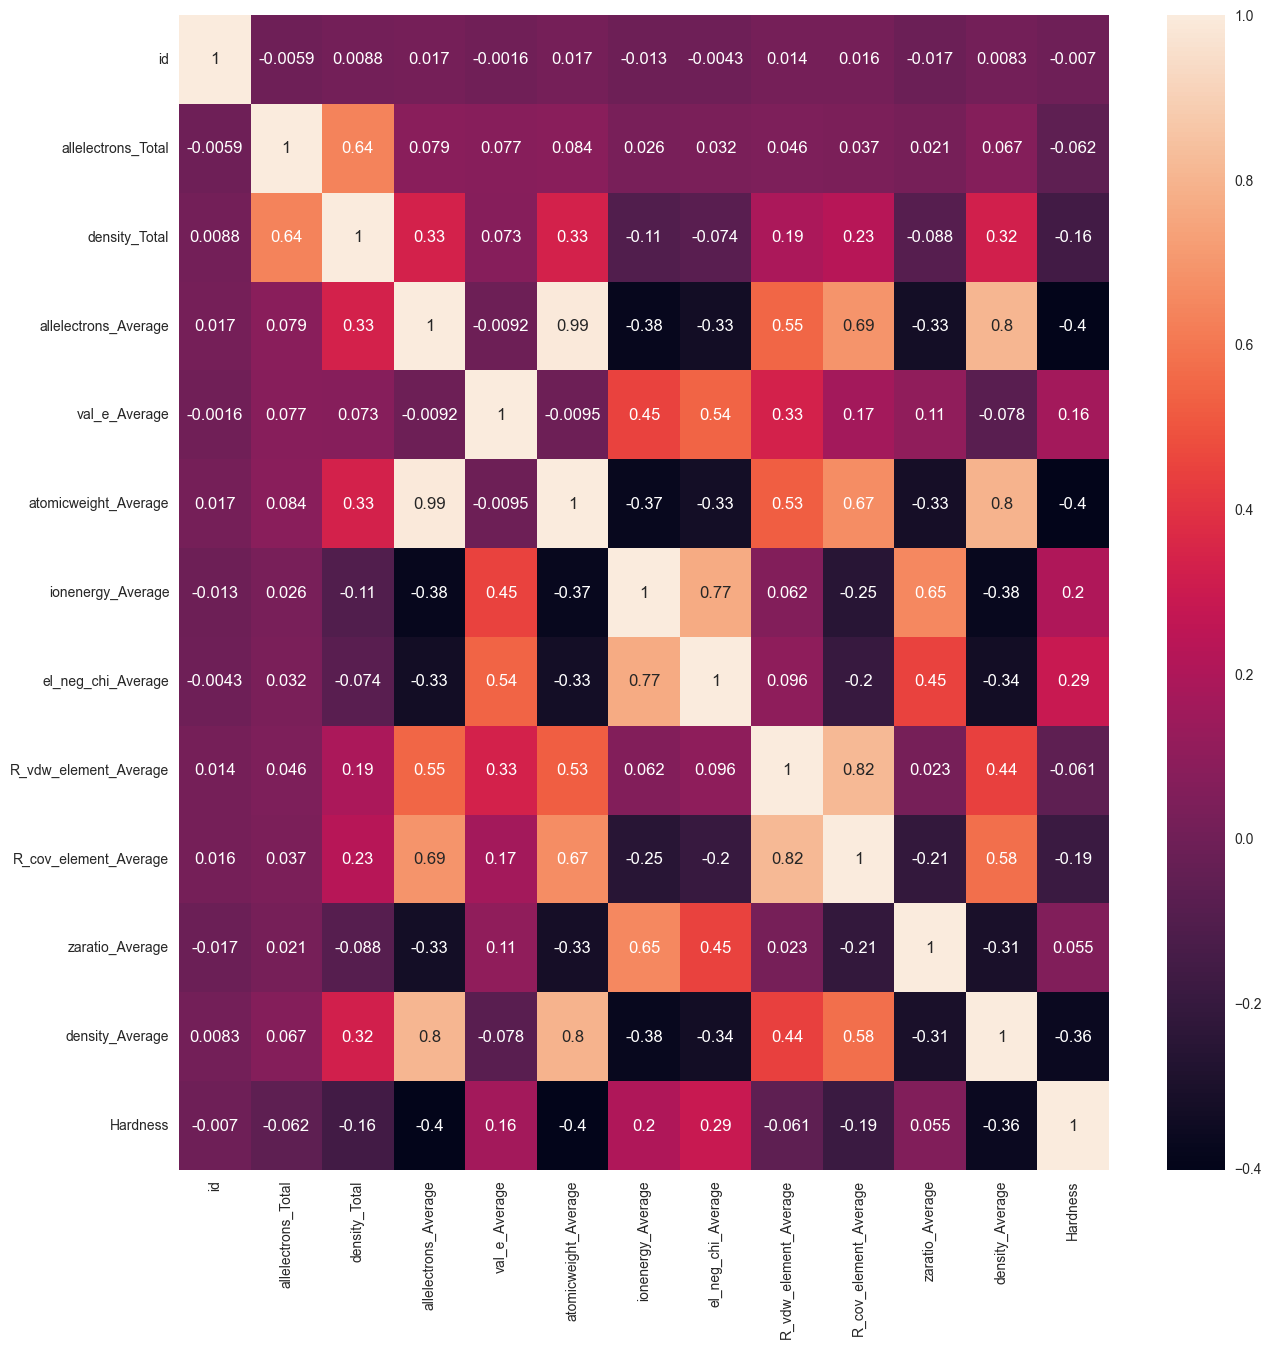

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [147]:
abs(df.corr(numeric_only=True)['Hardness'].sort_values(ascending=False))
#corelasyona bakıp .20 nin üstü sutunları aldık

Hardness                 1.000000
el_neg_chi_Average       0.290352
ionenergy_Average        0.203203
val_e_Average            0.161715
zaratio_Average          0.055248
id                       0.006989
R_vdw_element_Average    0.061402
allelectrons_Total       0.061687
density_Total            0.161524
R_cov_element_Average    0.189111
density_Average          0.360780
allelectrons_Average     0.400496
atomicweight_Average     0.402948
Name: Hardness, dtype: float64

In [148]:
df['Hardness'].replace(["", "NaN", "Na"], np.nan, inplace=True)
df['Hardness'].fillna(0, inplace=True)
#eksik değerleri o ile doldurduk

In [152]:
df.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [153]:
x=df[['id','ionenergy_Average','el_neg_chi_Average','density_Average','allelectrons_Average','atomicweight_Average']]
y=df['Hardness']

In [154]:
from sklearn.model_selection import train_test_split 
from scipy import stats

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  #p2(başarı oranını gösterir)

from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [157]:
def algo_test(x,y):
        #Bütün modelleri tanımla
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını  tablo haline getiren dataframe 
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tablodaki doğruluk ve hata oranlarını gösterir
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturulan result tablosunu doğruluk oranına (r2_score) göre sıralar
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable
    
    #kod:Zafer Acar

In [158]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.853223,1.000307,0.612035
Gradient Boosting,0.852391,1.003138,0.621257
KNeighborsRegressor,0.770022,1.252126,0.770767
Decision Tree,0.714772,1.394442,0.767839
Extra Tree,0.705732,1.416368,0.779496
Ridge,0.574971,1.702213,1.346519
Linear,0.574966,1.702222,1.346528
ElasticNet,0.570840,1.710465,1.354127
Lasso,0.570509,1.711123,1.354056


In [159]:
subset_df = df[['id', 'Hardness']]
print(subset_df)

         id  Hardness
0         0       6.0
1         1       6.5
2         2       2.5
3         3       6.0
4         4       6.0
...     ...       ...
6934  17341       0.0
6935  17342       0.0
6936  17343       0.0
6937  17344       0.0
6938  17345       0.0

[17346 rows x 2 columns]


In [160]:
df.to_pickle('mohs_dataset.pkl')

## AUOTOML

In [162]:
#pip install pycaret

In [163]:
from pycaret.regression import* 

In [164]:
df=pd.read_pickle('mohs_dataset.pkl')

In [165]:
df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [169]:
df_unique = df.drop_duplicates(subset='id', keep='first', ignore_index=True)
#tekrar eden veriyi silip yeniden indexledik

In [171]:
setup(data=df, target='Hardness', index=False)

,Description,Value
0,Session id,7882
1,Target,Hardness
2,Target type,Regression
3,Original data shape,"(31224, 13)"
4,Transformed data shape,"(31224, 13)"
5,Transformed train set shape,"(21856, 13)"
6,Transformed test set shape,"(9368, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [172]:
bestmodel=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2416,6.2686,2.5035,0.0942,0.8987,0.4292,0.4100
ada,AdaBoost Regressor,2.3342,6.5990,2.5687,0.0463,0.9587,0.3838,0.1240
lightgbm,Light Gradient Boosting Machine,2.3146,6.7406,2.5959,0.0260,0.9250,0.4372,0.0890
ridge,Ridge Regression,2.3685,6.8352,2.6143,0.0121,0.9331,0.4152,0.0140
lar,Least Angle Regression,2.3686,6.8356,2.6144,0.0121,0.9331,0.4154,0.0160
lr,Linear Regression,2.3685,6.8352,2.6143,0.0121,0.9331,0.4153,0.6430
br,Bayesian Ridge,2.3692,6.8413,2.6155,0.0113,0.9332,0.4148,0.0150
en,Elastic Net,2.3720,6.8613,2.6193,0.0084,0.9337,0.4152,0.0140
lasso,Lasso Regression,2.3718,6.8623,2.6195,0.0082,0.9338,0.4146,0.4410
llar,Lasso Least Angle Regression,2.3718,6.8623,2.6195,0.0082,0.9338,0.4146,0.0130


In [ ]:
#hata oranı düşük, yani model başarılı

In [174]:
best_model=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1944,5.9943,2.4483,0.1076,0.8900,0.4191
1,2.2481,6.2825,2.5065,0.0843,0.9047,0.4304
2,2.2492,6.2464,2.4993,0.0947,0.9019,0.4299
3,2.2662,6.5266,2.5547,0.0793,0.9022,0.4266
4,2.2370,6.2377,2.4975,0.1042,0.9035,0.4295
5,2.2697,6.4065,2.5311,0.0856,0.9049,0.4299
6,2.2312,6.1653,2.4830,0.1039,0.8985,0.4320
7,2.2191,6.1949,2.4889,0.0904,0.8851,0.4323
8,2.1996,6.0568,2.4611,0.1109,0.8956,0.4143


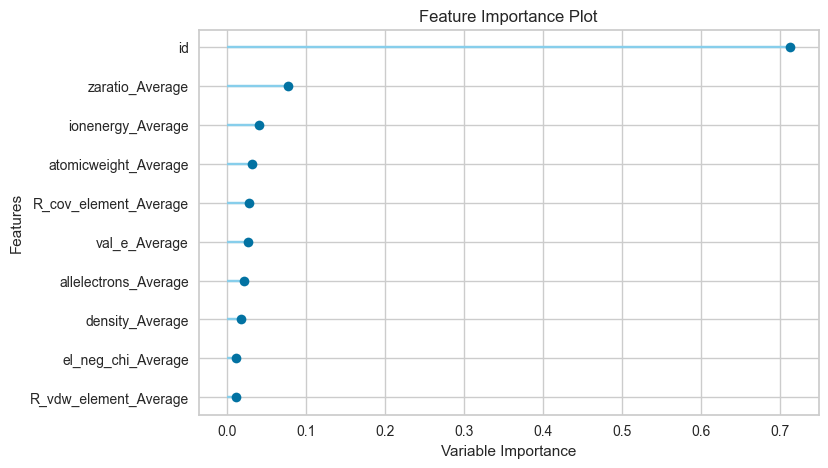

In [175]:
plot_model(best_model,plot='feature') 
#Hardness i etkileyen en önemli faktor 'zaratio-average' yani proton oranı